# Байесовские классификаторы

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
irises = load_iris()
data = irises['data'][:100, 2:]
target = irises['target'][:100]
target_names = irises['target_names'][:-1]
colors = np.array(['red', 'green'])

## Классификация ирисов Фишера наивным байесовским классификатором

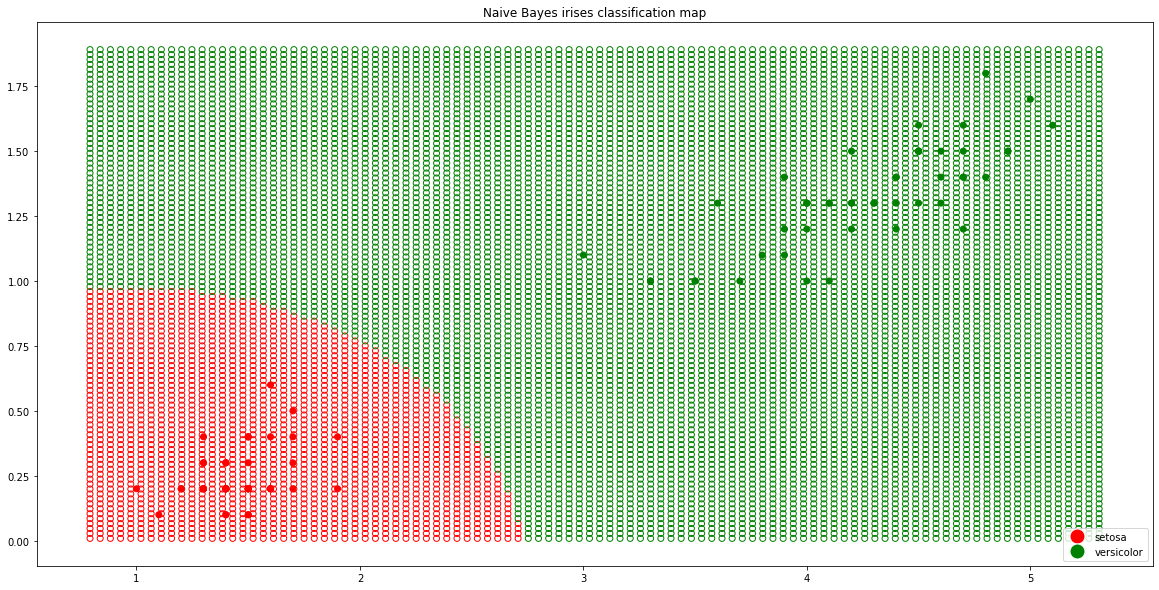

In [3]:
clf = GaussianNB()
clf.fit(data, target)

fig, ax= plt.subplots(figsize=(20, 10))

ax.scatter(data[:, 0], data[:, 1], color=colors[target])

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

ax.scatter(xx, yy, edgecolors=colors[Z], facecolors='none')

handlers = [Line2D([0], [0], marker='o', color='w', label=target_names[i], 
            markerfacecolor=colors[i], markersize=15) for i in range(0, len(colors))]
ax.legend(handles=handlers, loc='lower right')
ax.set_title('Naive Bayes irises classification map')

plt.show()


### Algorithm accuracy and confusion matrix

In [4]:
predictions = clf.predict(data)
true_count = (predictions == target).sum()
accuracy = true_count / len(data)
c_matrix = confusion_matrix(target, predictions)
print('Accuracy: %f' % accuracy)
print('Confusion matrix: ')
print(c_matrix)

Accuracy: 1.000000
Confusion matrix: 
[[50  0]
 [ 0 50]]


## Классификация ирисов Фишера Plug-in алгоритмом

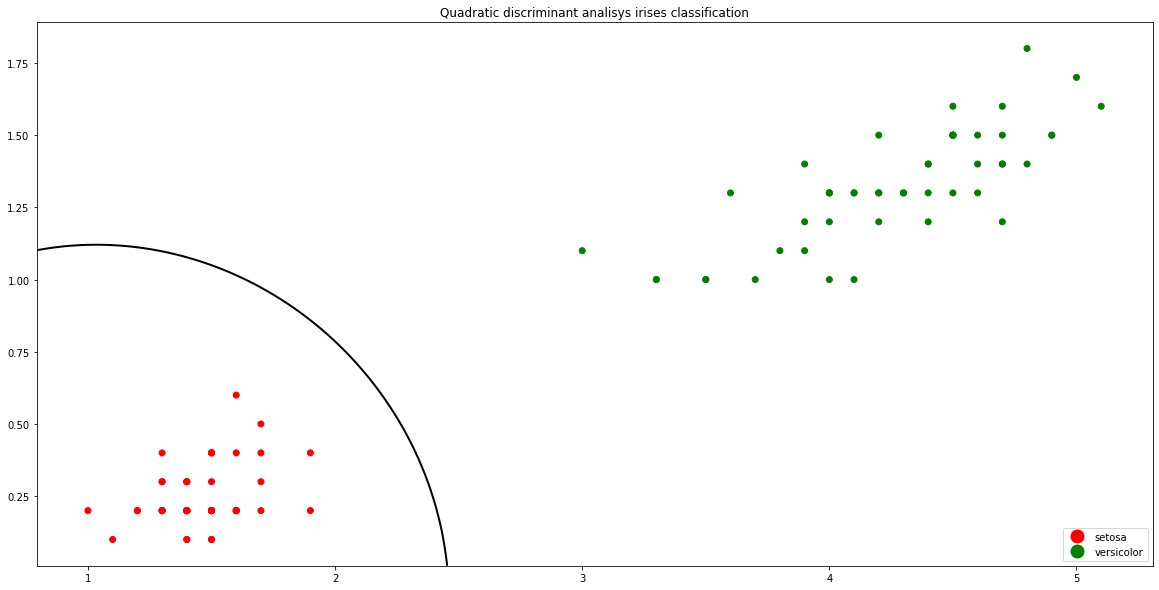

In [5]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(data, target)

colors = np.array(['red', 'green'])
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(data[:, 0], data[:, 1], color=colors[target])
handlers = [Line2D([0], [0], marker='o', color='w', label=target_names[i], 
            markerfacecolor=colors[i], markersize=15) for i in range(0, len(colors))]
ax.legend(handles=handlers, loc='lower right')
ax.set_title('Quadratic discriminant analisys irises classification')

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 0].reshape(xx.shape)
ax.contour(xx, yy, Z, [0.5], linewidths=2, colors='black')
plt.show()

## Классификация ирисов Фишера c помощью ЛДФ

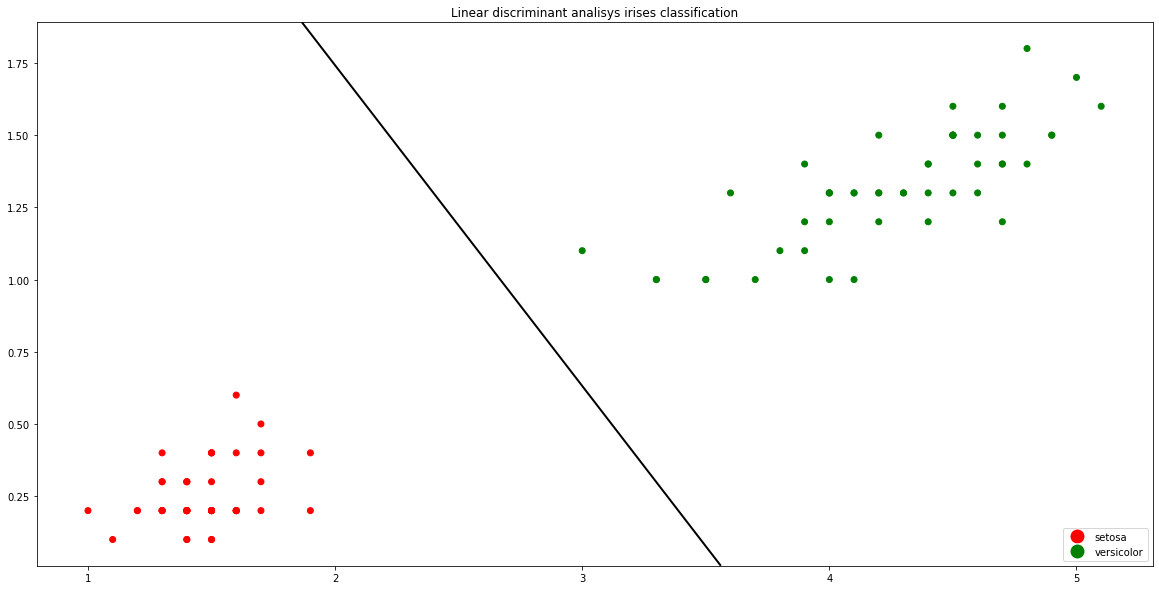

In [6]:
clf = LinearDiscriminantAnalysis()
clf.fit(data, target)

colors = np.array(['red', 'green'])
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(data[:, 0], data[:, 1], color=colors[target])
handlers = [Line2D([0], [0], marker='o', color='w', label=target_names[i], 
            markerfacecolor=colors[i], markersize=15) for i in range(0, len(colors))]
ax.legend(handles=handlers, loc='lower right')
ax.set_title('Linear discriminant analisys irises classification')

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 0].reshape(xx.shape)
ax.contour(xx, yy, Z, [0.5], linewidths=2, colors='black')
plt.show()